In [1]:
from matplotlib import pyplot as plt
import numpy as np
from optimize import optimize

In [8]:
def f(p):
    return (p[0] - 57) ** 2 + (p[1] - 179) ** 2

In [9]:
way = optimize(f)
x = [elem[0] for elem in way]
y = [elem[1] for elem in way]

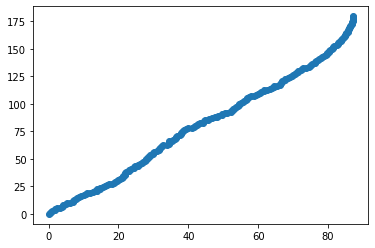

In [10]:
plt.scatter(x, y)
plt.show()